In [2]:
pip install pandas-datareader

In [29]:
import pandas_datareader as pdr
from pandas_datareader import data as web
import os

In [38]:
df =web.get_data_tiingo('AAPL',api_key="f92e16a78aaa7fab844ab36ce13552ec3c34728a")

In [39]:
df.to_csv('AAPL.csv')

In [40]:
import pandas as pd 

In [42]:
df = pd.read_csv('AAPL.csv')

In [45]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-11-16 00:00:00+00:00,171.10,171.87,170.3000,171.18,23497326,40.672860,40.855899,40.482689,40.691877,93989304,0.0,1.0
1,AAPL,2017-11-17 00:00:00+00:00,170.15,171.39,169.6400,171.04,21665811,40.447031,40.741797,40.325797,40.658597,86663244,0.0,1.0
2,AAPL,2017-11-20 00:00:00+00:00,169.98,170.56,169.5600,170.29,15974387,40.406620,40.544494,40.306780,40.480311,63897548,0.0,1.0
3,AAPL,2017-11-21 00:00:00+00:00,173.14,173.70,170.7800,170.78,24875471,41.157796,41.290916,40.596791,40.596791,99501884,0.0,1.0
4,AAPL,2017-11-22 00:00:00+00:00,174.96,175.00,173.0500,173.36,24997274,41.590436,41.599944,41.136402,41.210093,99989096,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,AAPL,2022-11-08 00:00:00+00:00,139.50,141.43,137.4900,140.41,89908477,139.500000,141.430000,137.490000,140.410000,89908477,0.0,1.0
1253,AAPL,2022-11-09 00:00:00+00:00,134.87,138.55,134.5933,138.50,74917794,134.870000,138.550000,134.593300,138.500000,74917794,0.0,1.0
1254,AAPL,2022-11-10 00:00:00+00:00,146.87,146.87,139.5000,141.24,118854028,146.870000,146.870000,139.500000,141.240000,118854028,0.0,1.0
1255,AAPL,2022-11-11 00:00:00+00:00,149.70,150.01,144.3700,145.82,93979665,149.700000,150.010000,144.370000,145.820000,93979665,0.0,1.0


In [46]:
df1 = df.reset_index()['close']

In [47]:
df1

0       171.10
1       170.15
2       169.98
3       173.14
4       174.96
         ...  
1252    139.50
1253    134.87
1254    146.87
1255    149.70
1256    148.28
Name: close, Length: 1257, dtype: float64

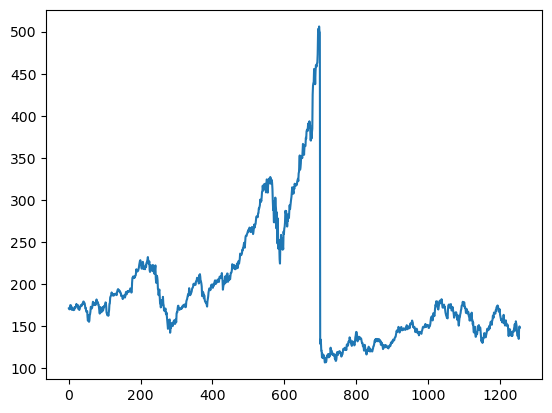

In [49]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.show()

In [50]:
#### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [51]:
import numpy as np

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [55]:
print(df1.shape)

(1257, 1)


In [56]:
## splitting Dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [59]:
print("Training Size: ",training_size)
print("Testing Size: ",test_size)

Training Size:  817
Testing Size:  440


In [60]:
print(train_data)

[[1.60951785e-01]
 [1.58572323e-01]
 [1.58146525e-01]
 [1.66061365e-01]
 [1.70619912e-01]
 [1.70644959e-01]
 [1.68440827e-01]
 [1.65886036e-01]
 [1.56894177e-01]
 [1.62830307e-01]
 [1.60826550e-01]
 [1.57695679e-01]
 [1.57294928e-01]
 [1.55716969e-01]
 [1.56493425e-01]
 [1.56618660e-01]
 [1.64884158e-01]
 [1.62454602e-01]
 [1.63882279e-01]
 [1.63757044e-01]
 [1.68140263e-01]
 [1.74276769e-01]
 [1.69567940e-01]
 [1.69092048e-01]
 [1.70745147e-01]
 [1.70745147e-01]
 [1.59624296e-01]
 [1.59699436e-01]
 [1.60901691e-01]
 [1.56268003e-01]
 [1.63857232e-01]
 [1.63782091e-01]
 [1.65785848e-01]
 [1.70720100e-01]
 [1.69092048e-01]
 [1.69041954e-01]
 [1.68941766e-01]
 [1.71421415e-01]
 [1.75954915e-01]
 [1.73700689e-01]
 [1.80989355e-01]
 [1.81390106e-01]
 [1.79386349e-01]
 [1.75729493e-01]
 [1.75829681e-01]
 [1.68766437e-01]
 [1.60976832e-01]
 [1.61978710e-01]
 [1.53087038e-01]
 [1.50607389e-01]
 [1.51759549e-01]
 [1.52636193e-01]
 [1.34402004e-01]
 [1.24358172e-01]
 [1.40738885e-01]
 [1.319974

In [61]:
print(test_data)

[[0.0572824 ]
 [0.05768316]
 [0.04798998]
 [0.04763932]
 [0.04636193]
 [0.03544145]
 [0.03611772]
 [0.05247339]
 [0.04578585]
 [0.03812148]
 [0.03328741]
 [0.03651847]
 [0.02384471]
 [0.0356794 ]
 [0.03291171]
 [0.03787101]
 [0.03554164]
 [0.04295554]
 [0.04691296]
 [0.04488416]
 [0.03428929]
 [0.03293676]
 [0.04145272]
 [0.03932373]
 [0.03318723]
 [0.03443957]
 [0.03599249]
 [0.03644333]
 [0.03271133]
 [0.0383469 ]
 [0.04047589]
 [0.04773951]
 [0.04851597]
 [0.0527489 ]
 [0.05891046]
 [0.06551033]
 [0.06111459]
 [0.06910457]
 [0.0630933 ]
 [0.0692799 ]
 [0.0684283 ]
 [0.0701315 ]
 [0.06579837]
 [0.0667752 ]
 [0.06286788]
 [0.06882905]
 [0.06983093]
 [0.06900438]
 [0.06697558]
 [0.06672511]
 [0.06166562]
 [0.0643707 ]
 [0.05262367]
 [0.05324984]
 [0.05735755]
 [0.05853475]
 [0.05011897]
 [0.04776456]
 [0.03989981]
 [0.04541014]
 [0.05162179]
 [0.04866625]
 [0.04510958]
 [0.04470883]
 [0.05127113]
 [0.0465623 ]
 [0.05074515]
 [0.05024421]
 [0.05011897]
 [0.0461866 ]
 [0.04450845]
 [0.04

In [63]:
import numpy as np

In [64]:
# convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX,dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0] ##i=0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [65]:
# reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [68]:
print(X_train.shape)
print(y_train.shape)

(716, 100)
(716,)


In [72]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [73]:
## Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [75]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 307ms/step - loss: 0.0312 - val_loss: 0.0012
Epoch 2/100
12/12 [==============================] - 2s 191ms/step - loss: 0.0124 - val_loss: 0.0011
Epoch 3/100
12/12 [==============================] - 2s 186ms/step - loss: 0.0098 - val_loss: 4.2338e-04
Epoch 4/100
12/12 [==============================] - 2s 178ms/step - loss: 0.0095 - val_loss: 8.3788e-04
Epoch 5/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0080 - val_loss: 3.6216e-04
Epoch 6/100
12/12 [==============================] - 2s 178ms/step - loss: 0.0073 - val_loss: 4.5997e-04
Epoch 7/100
12/12 [==============================] - 2s 179ms/step - loss: 0.0070 - val_loss: 3.0670e-04
Epoch 8/100
12/12 [==============================] - 2s 179ms/step - loss: 0.0070 - val_loss: 3.0309e-04
Epoch 9/100
12/12 [==============================] - 2s 178ms/step - loss: 0.0060 - val_loss: 5.1805e-04
Epoch 10/100
12/12 [==============================] - 2s 179ms/

12/12 [==============================] - 2s 208ms/step - loss: 0.0029 - val_loss: 4.5801e-04
Epoch 79/100
12/12 [==============================] - 2s 209ms/step - loss: 0.0027 - val_loss: 3.5387e-04
Epoch 80/100
12/12 [==============================] - 3s 220ms/step - loss: 0.0024 - val_loss: 2.2514e-04
Epoch 81/100
12/12 [==============================] - 3s 227ms/step - loss: 0.0020 - val_loss: 2.5367e-04
Epoch 82/100
12/12 [==============================] - 3s 221ms/step - loss: 0.0019 - val_loss: 2.3001e-04
Epoch 83/100
12/12 [==============================] - 3s 215ms/step - loss: 0.0024 - val_loss: 2.2609e-04
Epoch 84/100
12/12 [==============================] - 3s 219ms/step - loss: 0.0043 - val_loss: 7.2754e-04
Epoch 85/100
12/12 [==============================] - 3s 217ms/step - loss: 0.0032 - val_loss: 2.2292e-04
Epoch 86/100
12/12 [==============================] - 3s 221ms/step - loss: 0.0021 - val_loss: 2.1823e-04
Epoch 87/100
12/12 [==============================] - 2s 20

In [78]:
import tensorflow as tf 

In [79]:
tf.__version__

'2.10.0'

In [80]:
## Doing the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 38ms/step


In [81]:
## Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [83]:
## Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train,train_predict)))

243.61655198740965


In [84]:
## Test Data RMSE
print(math.sqrt(mean_squared_error(ytest,test_predict)))

156.448938732382


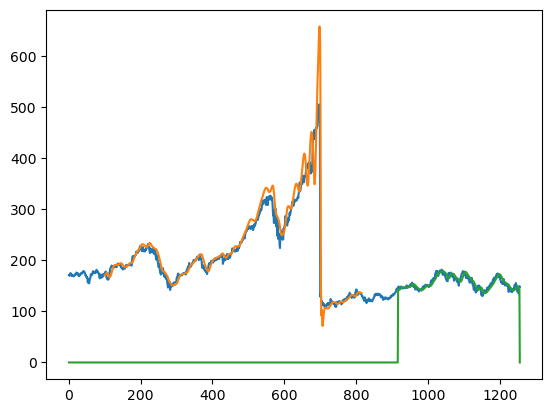

In [85]:
## Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [86]:
len(test_data)

440

In [87]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [90]:
x_input =test_data[340:].reshape(1,-1)

In [91]:
x_input.shape

(1, 100)

In [92]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [93]:
# demonstrate prediction for next 10 days
from numpy import array

In [94]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)
        
        


[0.09139522]
101
1 day input [0.08721353 0.07664371 0.08112711 0.07484033 0.0803757  0.08696306
 0.09036944 0.09896055 0.10068879 0.0952536  0.09773325 0.09680651
 0.10427051 0.10852849 0.10076393 0.11060739 0.11571697 0.12150282
 0.1183469  0.11549155 0.11211021 0.12510958 0.12651221 0.13943644
 0.13693175 0.1331747  0.14850344 0.14770194 0.14654978 0.14534753
 0.14547276 0.15629305 0.15441453 0.16345648 0.1661866  0.16578585
 0.16959299 0.16859111 0.16200376 0.15211021 0.15125861 0.15201002
 0.15827176 0.14221666 0.13660614 0.13041954 0.1261866  0.12804008
 0.12265498 0.11944897 0.12303068 0.11927364 0.1265623  0.14174076
 0.11772073 0.12140263 0.11403882 0.10985598 0.11932373 0.1253851
 0.11742016 0.11496556 0.10917971 0.11003131 0.11251096 0.10770194
 0.08926738 0.07854728 0.08919224 0.09833438 0.09908579 0.09665623
 0.08328115 0.0841077  0.08050094 0.07889793 0.09054477 0.07899812
 0.08909205 0.09244834 0.09272386 0.09154665 0.10126487 0.10672511
 0.11396368 0.10647464 0.09507827 

10 day output [[0.09353808]]
11 day input [0.09773325 0.09680651 0.10427051 0.10852849 0.10076393 0.11060739
 0.11571697 0.12150282 0.1183469  0.11549155 0.11211021 0.12510958
 0.12651221 0.13943644 0.13693175 0.1331747  0.14850344 0.14770194
 0.14654978 0.14534753 0.14547276 0.15629305 0.15441453 0.16345648
 0.1661866  0.16578585 0.16959299 0.16859111 0.16200376 0.15211021
 0.15125861 0.15201002 0.15827176 0.14221666 0.13660614 0.13041954
 0.1261866  0.12804008 0.12265498 0.11944897 0.12303068 0.11927364
 0.1265623  0.14174076 0.11772073 0.12140263 0.11403882 0.10985598
 0.11932373 0.1253851  0.11742016 0.11496556 0.10917971 0.11003131
 0.11251096 0.10770194 0.08926738 0.07854728 0.08919224 0.09833438
 0.09908579 0.09665623 0.08328115 0.0841077  0.08050094 0.07889793
 0.09054477 0.07899812 0.08909205 0.09244834 0.09272386 0.09154665
 0.10126487 0.10672511 0.11396368 0.10647464 0.09507827 0.12247965
 0.11646838 0.10973075 0.09565435 0.08025047 0.07899812 0.08035066
 0.08180338 0.070206

19 day output [[0.09457191]]
20 day input [0.11549155 0.11211021 0.12510958 0.12651221 0.13943644 0.13693175
 0.1331747  0.14850344 0.14770194 0.14654978 0.14534753 0.14547276
 0.15629305 0.15441453 0.16345648 0.1661866  0.16578585 0.16959299
 0.16859111 0.16200376 0.15211021 0.15125861 0.15201002 0.15827176
 0.14221666 0.13660614 0.13041954 0.1261866  0.12804008 0.12265498
 0.11944897 0.12303068 0.11927364 0.1265623  0.14174076 0.11772073
 0.12140263 0.11403882 0.10985598 0.11932373 0.1253851  0.11742016
 0.11496556 0.10917971 0.11003131 0.11251096 0.10770194 0.08926738
 0.07854728 0.08919224 0.09833438 0.09908579 0.09665623 0.08328115
 0.0841077  0.08050094 0.07889793 0.09054477 0.07899812 0.08909205
 0.09244834 0.09272386 0.09154665 0.10126487 0.10672511 0.11396368
 0.10647464 0.09507827 0.12247965 0.11646838 0.10973075 0.09565435
 0.08025047 0.07899812 0.08035066 0.08180338 0.07020664 0.10026299
 0.10735128 0.10379461 0.09139522 0.09170326 0.09207369 0.09239193
 0.09264078 0.092835

28 day output [[0.09548809]]
29 day input [0.14654978 0.14534753 0.14547276 0.15629305 0.15441453 0.16345648
 0.1661866  0.16578585 0.16959299 0.16859111 0.16200376 0.15211021
 0.15125861 0.15201002 0.15827176 0.14221666 0.13660614 0.13041954
 0.1261866  0.12804008 0.12265498 0.11944897 0.12303068 0.11927364
 0.1265623  0.14174076 0.11772073 0.12140263 0.11403882 0.10985598
 0.11932373 0.1253851  0.11742016 0.11496556 0.10917971 0.11003131
 0.11251096 0.10770194 0.08926738 0.07854728 0.08919224 0.09833438
 0.09908579 0.09665623 0.08328115 0.0841077  0.08050094 0.07889793
 0.09054477 0.07899812 0.08909205 0.09244834 0.09272386 0.09154665
 0.10126487 0.10672511 0.11396368 0.10647464 0.09507827 0.12247965
 0.11646838 0.10973075 0.09565435 0.08025047 0.07899812 0.08035066
 0.08180338 0.07020664 0.10026299 0.10735128 0.10379461 0.09139522
 0.09170326 0.09207369 0.09239193 0.09264078 0.09283574 0.09299717
 0.09314085 0.0932763  0.09340819 0.09353808 0.09366596 0.09379118
 0.0939131  0.094031

In [95]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [96]:
len(df1)

1257

In [97]:
df3=df1.tolist()
df3.extend(lst_output)

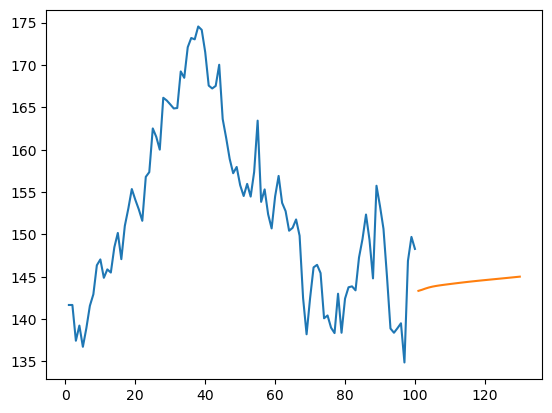

In [99]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

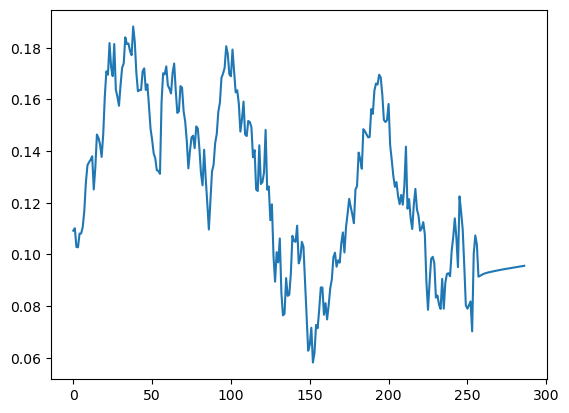

In [100]:
plt.plot(df3[1000:])
plt.show()

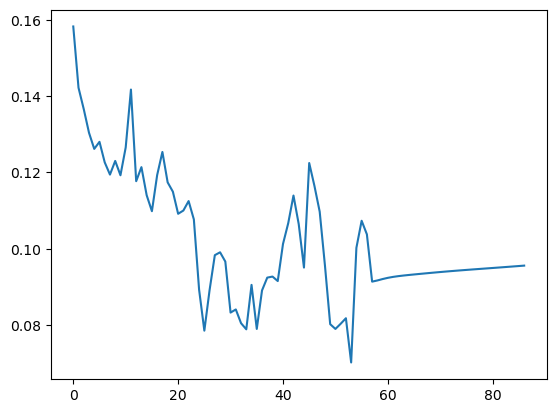

In [102]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])
plt.show()